In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image

import os
import numpy as np
from IPython.display import Image,display

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('images/train',
target_size = (64, 64),
batch_size = 20,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('images/test',
target_size = (64, 64),
batch_size = 20,
class_mode = 'binary')
classifier.fit_generator(training_set,
steps_per_epoch = 200,
epochs = 5,
validation_data = test_set,
validation_steps = 36)


Found 180 images belonging to 2 classes.
Found 20 images belonging to 1 classes.
Epoch 1/5
200/200 [==============================] - 16s 82ms/step - loss: 0.4095 - accuracy: 0.8015 - val_loss: 1.9909 - val_accuracy: 0.5500
Epoch 2/5
200/200 [==============================] - 17s 83ms/step - loss: 0.1053 - accuracy: 0.9630 - val_loss: 2.9754 - val_accuracy: 0.6500
Epoch 3/5
200/200 [==============================] - 17s 84ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 3.2122 - val_accuracy: 0.6500
Epoch 4/5
200/200 [==============================] - 17s 86ms/step - loss: 0.0073 - accuracy: 0.9990 - val_loss: 4.5354 - val_accuracy: 0.6500
Epoch 5/5
200/200 [==============================] - 17s 87ms/step - loss: 0.0265 - accuracy: 0.9927 - val_loss: 5.7219 - val_accuracy: 0.5500


In [5]:
# Part 3 - Making new predictions


def whatisthat(img_name):
  test_image = image.load_img(img_name, target_size = (64, 64))
  display(Image(filename=img_name))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = classifier.predict(test_image)
  training_set.class_indices

  if result[0][0] == 1:
    prediction = 'Coca Cola'
    print(img_name + ' Predicted: Coca Cola')
  else:
    prediction = 'Amstel'
    print(img_name + ' Predicted: Amstel')

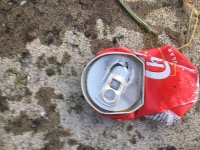

images/test/test/cocacola_000098.jpg Predicted: Amstel




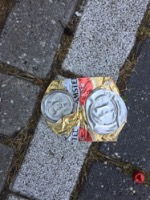

images/test/test/amstel_000092.jpg Predicted: Amstel




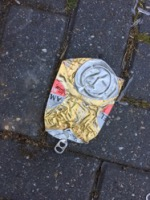

images/test/test/amstel_000093.jpg Predicted: Amstel




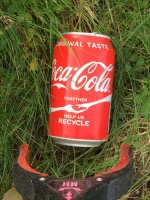

images/test/test/cocacola_000099.jpg Predicted: Coca Cola




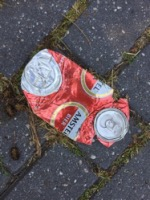

images/test/test/amstel_000091.jpg Predicted: Coca Cola




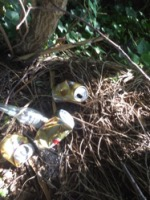

images/test/test/amstel_000090.jpg Predicted: Amstel




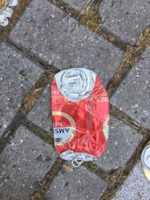

images/test/test/amstel_000094.jpg Predicted: Coca Cola




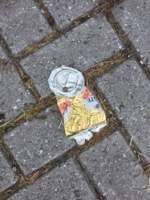

images/test/test/amstel_000095.jpg Predicted: Amstel




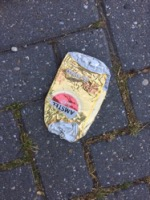

images/test/test/amstel_000097.jpg Predicted: Amstel




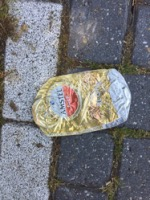

images/test/test/amstel_000096.jpg Predicted: Amstel




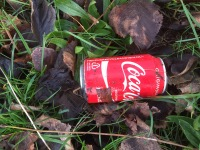

images/test/test/cocacola_000091.jpg Predicted: Coca Cola




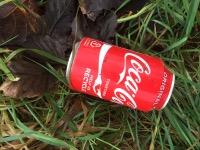

images/test/test/cocacola_000090.jpg Predicted: Coca Cola




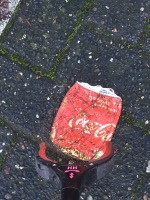

images/test/test/cocacola_000092.jpg Predicted: Coca Cola




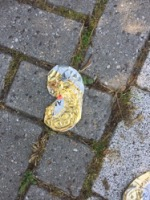

images/test/test/amstel_000098.jpg Predicted: Amstel




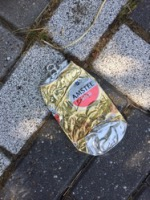

images/test/test/amstel_000099.jpg Predicted: Amstel




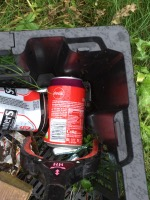

images/test/test/cocacola_000093.jpg Predicted: Coca Cola




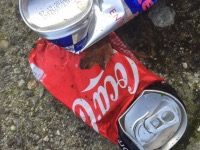

images/test/test/cocacola_000097.jpg Predicted: Coca Cola




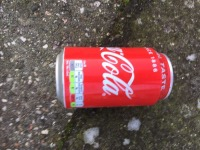

images/test/test/cocacola_000096.jpg Predicted: Coca Cola




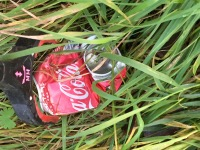

images/test/test/cocacola_000094.jpg Predicted: Coca Cola




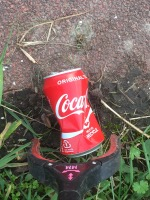

images/test/test/cocacola_000095.jpg Predicted: Coca Cola




In [6]:
path = 'images/test/test'
files = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
   for file in f:
     if '.jpg' in file:
       files.append(os.path.join(r, file))

for f in files:
   whatisthat(f)
   print('\n')